In [8]:
import numpy as np
import scipy.io as spio
from scipy.integrate import solve_ivp
##%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
rcParams['font.size'] = 18
rc('font', family='sans-serif')
rcParams['font.family'] = 'Serif'
rcParams['font.weight'] = 'light'
rcParams['mathtext.fontset'] = 'cm'
# changed to False because I am not using LaTex
rcParams['text.usetex'] = False



In [14]:
Cm = 3.0    # Membrane Capcitance uF
gc = 1.1   # mS conductance take similar to traub model so that the resistance are in the order of Mohm 
gl = 0.15
tau = Cm/gl
pc = gc/gl #coupling/leak
t1 = 2.5
t2 = 22.5

# Stimulus current, this should be 10 instead of 10e-5, likely due to her implementation
def Istim(t):
    if t>2.5 and t<22.5:
        Istim = 10
    else:
        Istim=0
    return Istim



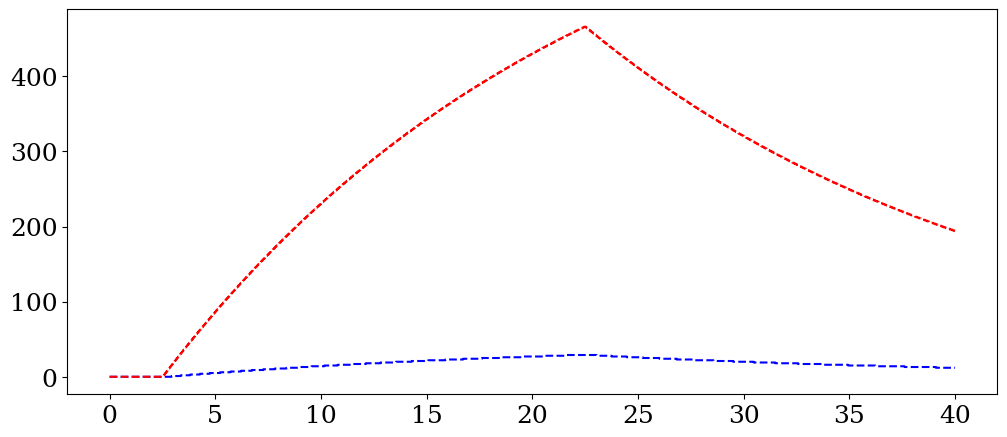

In [23]:
import math
def func_soma (t, t1, t2): 
    if t<t1:
        return 0
    elif t>=t1 and t<=t2:
        # when Q = 10*(t2-t1)
        return 10*(t2-t1)*(1-math.e**((t1-t)/tau))/((t2-t1)*gl*math.sqrt(2))
    else:
        return 10*(t2-t1)*((math.e**((t2-t)/tau))-math.e**((t1-t)/tau))/((t2-t1)*gl*math.sqrt(2))

vfunc_soma = np.vectorize(fun_soma)

def func_dend (t, t1, t2): 
    if t<t1:
        return 0
    elif t>=t1 and t<=t2:
        # when Q = 10*(t2-t1)
        return 10*(t2-t1)*(1+2*pc)*(1-math.e**((t1-t)/tau))/((t2-t1)*gl*math.sqrt(2))
    else:
        return 10*(t2-t1)*(1+2*pc)*((math.e**((t2-t)/tau))-math.e**((t1-t)/tau))/((t2-t1)*gl*math.sqrt(2))

vfunc_soma = np.vectorize(func_soma)
vfunc_dend = np.vectorize(func_dend)

t = np.linspace(0, 40, 5000)    
y_soma = vfunc_soma(t, t1, t2)
y_dend = vfunc_dend(t, t1, t2)

#display results
fig1 = plt.figure(figsize=(12,5))
plt.plot(t, y_soma, linestyle='--', c='b', label='soma_analytical')
plt.plot(t, y_dend, linestyle='--', c='r', label='dend_analytical')
plt.show()